# boxenplot

При рассмотрении примеров работы библиотеки seaborn, нам также понадобятся библиотеки matplotlib, pandas и numpy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'svg'

Данный код позволяет отображать графики в формате SVG (Scalable Vector Graphics), то есть в формате векторной графики. SVG основан на векторах, и это означает, что изображения состоят из линий и форм, а не пикселей. Это позволяет масштабировать изображения без потери качества.

Функция `sns.boxenplot()` (box plot enhanced) в библиотеке *seaborn* используется для создания расширенных ящиков с усами, которые особенно полезны для отображения распределения данных, когда их много или они имеют сложную структуру. *Boxenplot* разбивает данные на уровни или квантильные диапазоны, показывая более детальное распределение.

Основные параметры функции:
- `data`: DataFrame, массив;
- `x, y, hue`: переменные для построения графика. X и Y задают координаты, а hue позволяет добавлять цветовое различие для дополнительной переменной;
- `hue_order`: порядок отображения категорий по параметру hue;
- `dodge`: разделение категорий по параметру hue;
- `order`: порядок отображения категорий;
- `k_depth`: глубина квантилей для отображения. Может быть 'tukey' (по умолчанию), 'proportion', 'trustworthy', 'full' или числом;
- `outlier_prop`: пропорция выбросов для квантилей; используется, когда k_depth='proportion' (по умолчанию outlier_prop=0.007);
- `trust_alpha`: доверительный уровень для отображения данных; используется, когда k_depth='trustworthy' (по умолчанию trust_alpha=0.05);
- `width_method`: используется для управления шириной коробок. Возможные значения: 'exponential' (по умолчанию), 'linear', 'area';
- `orient`: ориентация графика, может быть вертикальной 'v' или горизонтальной 'h';
- `saturation`: интенсивность цвета;
- `width`: ширина ящиков;
- `linewidth`: толщина линий ящика;
- `showfliers`: отображение выбросов.

Рассматривать варианты построения графиков *boxentplot* будем на примере данных из датасета `'diamonds'`. Для начала загрузим этот датасет из библиотеки *seaborn* и посмотрим на содержащуюся в нём информацию:

In [3]:
diamonds = sns.load_dataset('diamonds')

diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


Датасет `'diamonds'` содержит информацию о различных параметрах бриллиантов. Вот какие данные содержатся в каждой колонке этого датасета:
- **carat (карат)**: Вес бриллианта в каратах. Карат - это единица измерения массы, которая равна 0.2 грамма;
- **cut (качество огранки)**: Категория, описывающая качество огранки бриллианта. Возможные значения: Fair (удовлетворительное качество), Good (хорошее качество), Very Good (очень хорошее качество), Premium (премиум качество), Ideal (идеальное качество);
- **color (цвет)**: Отражает цвет бриллианта. Международная система GIA описывает наивысший цвет латинской буквой D, и далее по нисходящей идут цвета E, F, G, H, I, J и т.д. Маркировка цвета D означает "бесцветный" и является наиболее ценным;
- **clarity (чистота)**: Оценка чистоты бриллианта, то есть наличия или отсутствия дефектов. Значения варьируются от I1 (с наибольшими дефектами) до IF (без включений);
- **depth (глубина)**: Процентное соотношение максимальной глубины бриллианта к его среднему диаметру;
- **table (таблица)**: Процентное соотношение ширины верхней грани бриллианта к его общей ширине;
- **price (цена)**: Цена бриллианта в долларах США;
- **x (длина)**: Длина бриллианта в миллиметрах;
- **y (ширина)**: Ширина бриллианта в миллиметрах;
- **z (глубина)**: Глубина бриллианта в миллиметрах.

Построим график boxenplot:

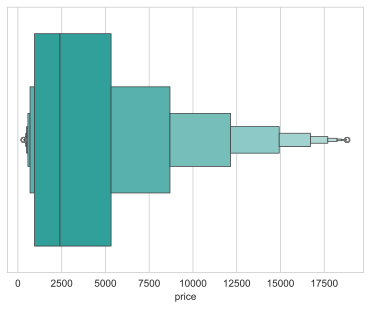

In [5]:
sns.set_style('whitegrid')

sns.boxenplot(data=diamonds, x='price',
              color='LightSeaGreen');

Из этого графика видим, что коробки делятся на квантильные диапазоны: межквартильный диапазон (IQR) и более мелкие квантильные диапазоны.

Для сравнения построим диаграмму размаха:

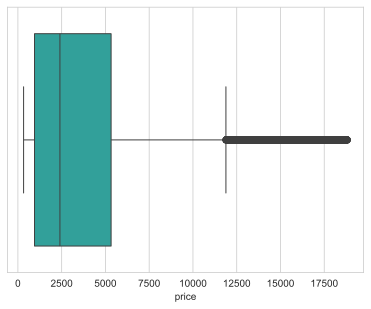

In [6]:
sns.boxplot(data=diamonds, x='price',
            color='LightSeaGreen');

**Параметр k_depth**

Параметр` k_dept`h в функции` sns.boxenplot(`) библиотеки* seabor*n определяет количество уровней, которые будут вычисляться и отображаться в каждом хвосте распределения данных. Этот параметр можно настроить несколькими способами: с использованием предустановленных режимов или с помощью целого числа.

Параме`тр k_de`pth может принимать следующие значени- `'tukey'`: Этот режим использует логарифм по основанию 2 от числа наблюдений, уменьшенный на 3, чтобы определить количество уровней. Покрывает примерно тот же диапазон, что и усы в стандартном графике boxplot.
- `'proportion`': Этот режим оставляет примерно outlier_prop выбросов. Полезен, если необходимо контролировать количество выбросов. Например, если outlier_prop=0.1, то останется около 10% выбросов.- `
'trustworthy`': В этом режиме уровни разбиений расширяются до уровня, который обеспечивает доверие не менее trust_alpha. Гарантирует, что уровни разбиений охватывают данные с заданным уровнем уверенности. Например, если trust_alpha=0.05, то разбиения охватывают данные с доверительным интервалом 95%.- `
'ful`l': Этот режим использует логарифм по основанию 2 от числа наблюдений, увеличенный на 1, чтобы определить количество уровней. Охватывает самые экстремальные точки в данных- `Целое число`: Указывает конкретное количество квантильных уровней, которые необходимо отобразить..ли данными.

По умолчанию параметр k_depth принимает значение 'tukey':

**Параметр k_depth**

Параметр `k_depth` в функции `sns.boxenplot()` библиотеки *seaborn* определяет количество уровней, которые будут вычисляться и отображаться в каждом хвосте распределения данных. Этот параметр можно настроить несколькими способами: с использованием предустановленных режимов или с помощью целого числа.

Параметр `k_depth` может принимать следующие значения:
- `'tukey'`: Этот режим использует логарифм по основанию 2 от числа наблюдений, уменьшенный на 3, чтобы определить количество уровней. Покрывает примерно тот же диапазон, что и усы в стандартном графике boxplot.
- `'proportion'`: Этот режим оставляет примерно outlier_prop выбросов. Полезен, если необходимо контролировать количество выбросов. Например, если outlier_prop=0.1, то останется около 10% выбросов.
- `'trustworthy'`: В этом режиме уровни разбиений расширяются до уровня, который обеспечивает доверие не менее trust_alpha. Гарантирует, что уровни разбиений охватывают данные с заданным уровнем уверенности. Например, если trust_alpha=0.05, то разбиения охватывают данные с доверительным интервалом 95%.
- `'full'`: Этот режим использует логарифм по основанию 2 от числа наблюдений, увеличенный на 1, чтобы определить количество уровней. Охватывает самые экстремальные точки в данных.
- `Целое число`: Указывает конкретное количество квантильных уровней, которые необходимо отобразить.

По умолчанию параметр `k_depth` принимает значение `'tukey'`:

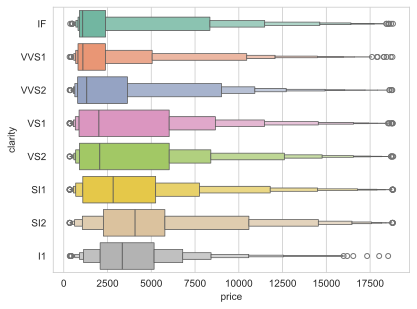

In [7]:
sns.boxenplot(data=diamonds, x='price', y='clarity',
              palette='Set2',
              hue='clarity');

Параметр `k_depth` со значением `'full'`:

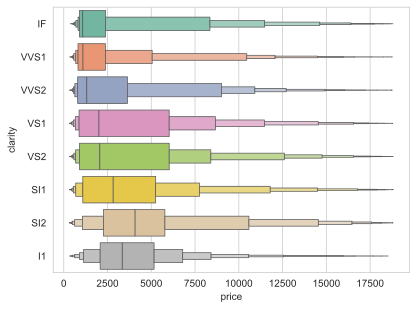

In [8]:
sns.boxenplot(data=diamonds, x='price', y='clarity',
              palette='Set2',
              hue='clarity',
              k_depth='full');

Параметр `k_depth` со значением `'proportion'`:

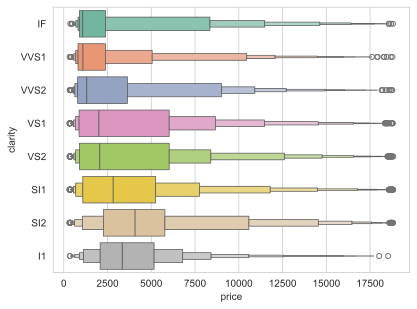

In [9]:
sns.boxenplot(data=diamonds, x='price', y='clarity',
              palette='Set2',
              hue='clarity',
              k_depth='proportion');

Этот режим оставляет примерно `outlier_prop` выбросов. Соответственно, долю выбросов можно регулировать параметром `outlier_prop`. Например, сделаем так, чтобы 10% данных в каждой категории считались выбросами:

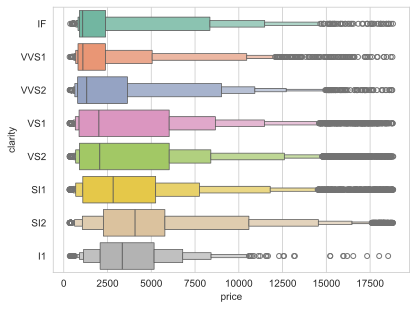

In [10]:
sns.boxenplot(data=diamonds, x='price', y='clarity',
              palette='Set2',
              hue='clarity',
              k_depth='proportion',
              outlier_prop=0.1);

Параметр `k_depth` со значением `'trustworthy'`:

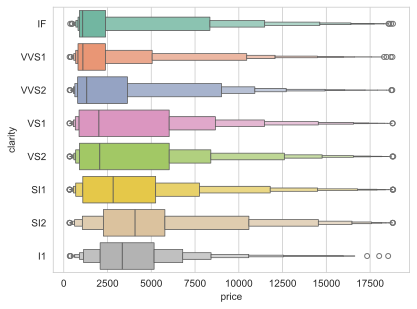

In [11]:
sns.boxenplot(data=diamonds, x='price', y='clarity',
              palette='Set2',
              hue='clarity',
              k_depth='trustworthy');

В этом режиме уровни разбиений расширяются до уровня, который обеспечивает доверие не менее `trust_alpha`. По умолчанию параметр `trust_alpha=0.05`, то есть разбиения охватывают данные с доверительным интервалом 95%.

Например, уменьшим доверительный интервал до 90%:

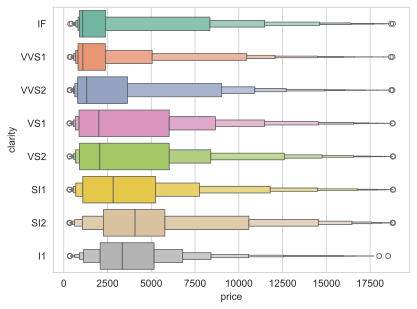

In [12]:
sns.boxenplot(data=diamonds, x='price', y='clarity',
              palette='Set2',
              hue='clarity',
              k_depth='trustworthy',
              trust_alpha=0.1);

Еще параметру `k_depth` можно передавать целочисленные значения:

Например, `k_depth=1`:

In [14]:
sns.boxenplot(data=diamonds, x='price', y='clarity',
              palette='Set2',
              hue='clarity',
              k_depth=1);

Или посмотрим, как будет выглядеть диаграмма при k_depth=3:

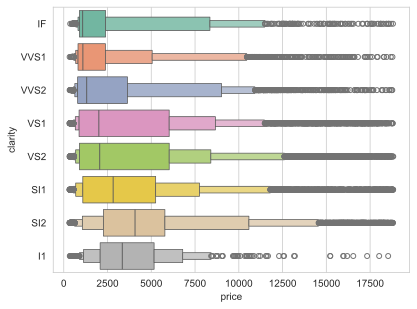

In [15]:
sns.boxenplot(data=diamonds, x='price', y='clarity',
              palette='Set2',
              hue='clarity',
              k_depth=3);

**Параметр width_method**

Параметр `width_method` функции `sns.boxenplot()` определяет способ вычисления ширины коробок (ящиков) на графике. Этот параметр помогает управлять тем, как ширина коробок отражает плотность данных в соответствующих интервалах.

Возможные значения праметра `width_method`:
- `'linear'`: уменьшает ширину каждой коробки равномерно по мере удаления от медианы;
- `'exponential'`: уменьшает ширину коробок экспоненциально, что делает уровни распределения данных более различимыми;
- `'area'`: обеспечивает, чтобы площадь коробок пропорционально отражала количество данных.

По умолчанию применяется `'exponential'`:

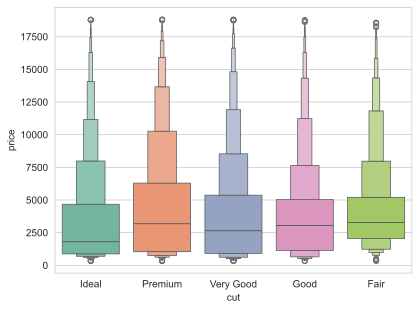

In [16]:
sns.boxenplot(data=diamonds, x='cut', y='price',
              palette='Set2',
              hue='cut');

Со значением `'linear'`:

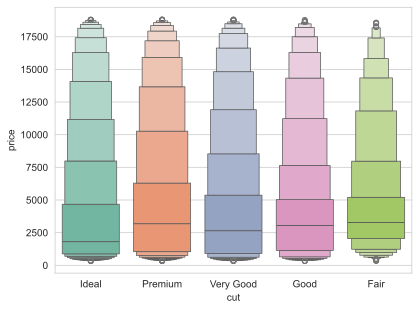

In [17]:
sns.boxenplot(data=diamonds, x='cut', y='price',
              palette='Set2',
              hue='cut',
              width_method='linear');

Со значением `'area'`:

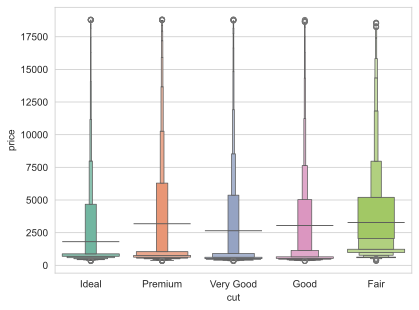

In [18]:
sns.boxenplot(data=diamonds, x='cut', y='price',
              palette='Set2',
              hue='cut',
              width_method='area');

Используя функцию `plt.ylim()` библиотеки *matplotlib*, можно более детально рассмотреть участки графика, которые плохо видны:

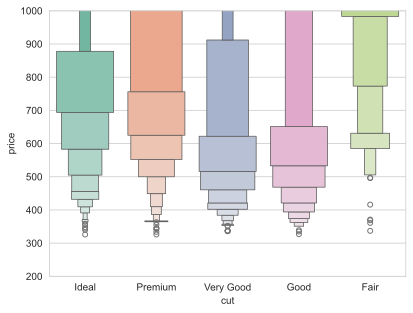

In [19]:
sns.boxenplot(data=diamonds, x='cut', y='price',
              palette='Set2',
              hue='cut',
              width_method='area')

plt.ylim(200, 1000)
plt.show()

Если параметру `showfliers` функции `sns.boxenplot()` передать значение `False`, то выбросы не будут показаны на графике:

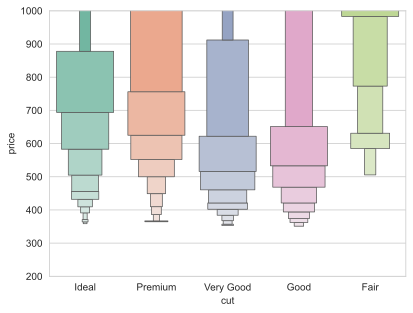

In [20]:
sns.boxenplot(data=diamonds, x='cut', y='price',
              palette='Set2',
              hue='cut',
              width_method='area',
              showfliers=False)

plt.ylim(200, 1000);

Параметром `fill=False` можно убрать заливку:

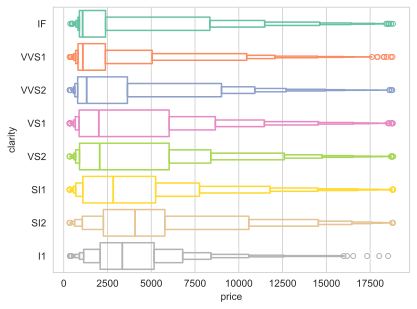

In [21]:
sns.boxenplot(data=diamonds, x='price', y='clarity',
              palette='Set2',
              hue='clarity',
              fill=False);

Параметром `linewidth` возможно варьировать шириной линии границ ящиков. Например, сделаем линии границ потоньше:

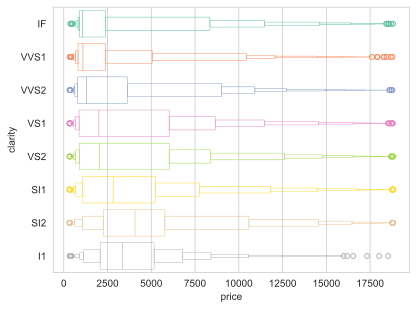

In [22]:
sns.boxenplot(data=diamonds, x='price', y='clarity',
              palette='Set2',
              hue='clarity',
              fill=False,
              linewidth=0.5);

Параметром `linecolor` позволяет менять цвет линий границ ящиков. Например, поменяем цвет линий на красный:

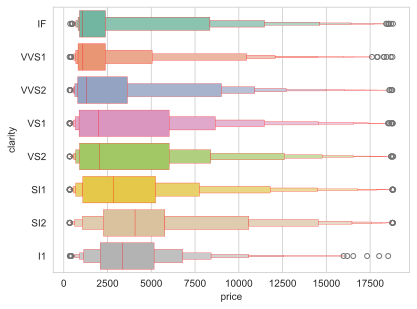

In [23]:
sns.boxenplot(data=diamonds, x='price', y='clarity',
              palette='Set2',
              hue='clarity',
              linewidth=0.25,
              linecolor='red');

Параметр `flier_kws` позволяет управлять внешним видом точек выбросов. Например, сделаем заливку точек красным цветом:

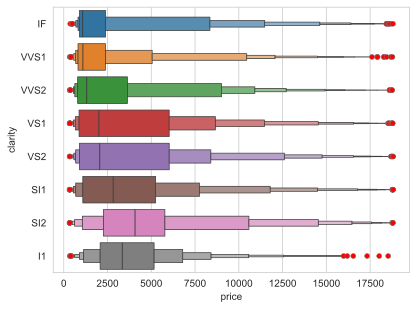

In [24]:
sns.boxenplot(data=diamonds, x='price', y='clarity',
              hue='clarity',
              flier_kws=dict(facecolor='red', linewidth=0.5));

Или сделаем границы точек выбросов красным цветом:

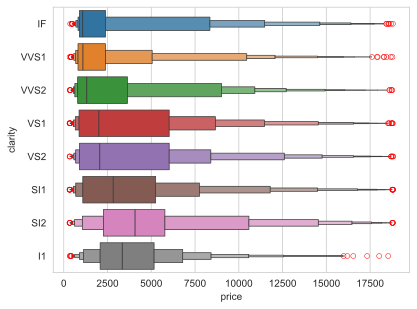

In [25]:
sns.boxenplot(data=diamonds, x='price', y='clarity',
              hue='clarity',
              flier_kws={'edgecolor': 'red', 'linewidth': 0.5});

**Для понимания**

In [26]:
from IPython.display import display, Image

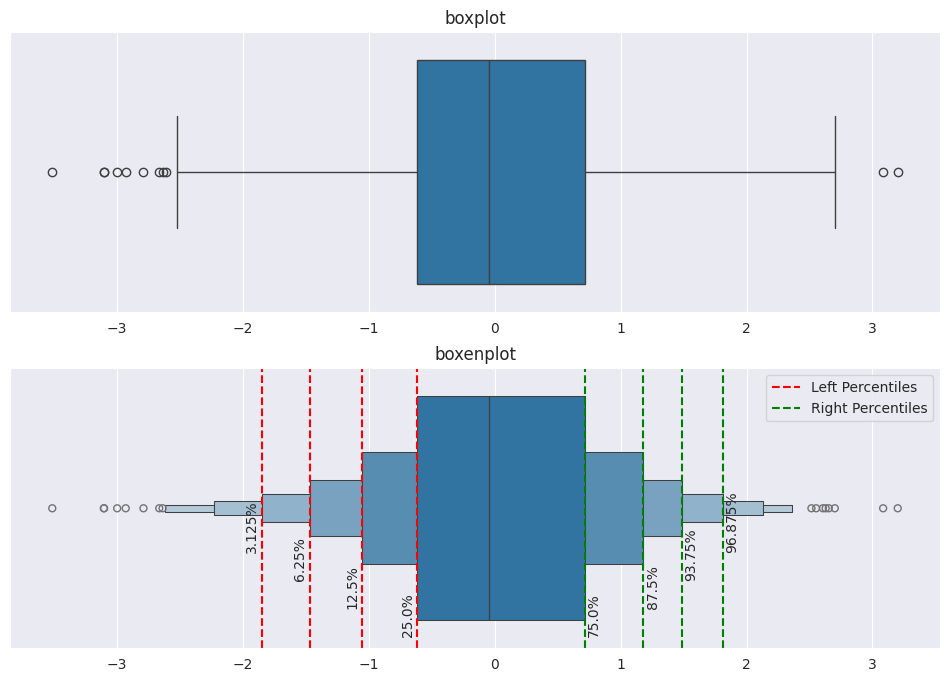

In [28]:
display(Image(filename='boxenplot.png'))